<a href="https://colab.research.google.com/github/ripky/OFA/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

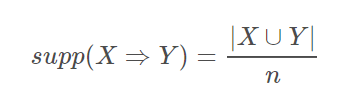

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

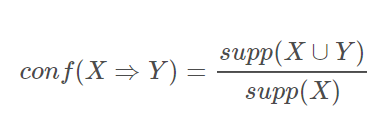

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
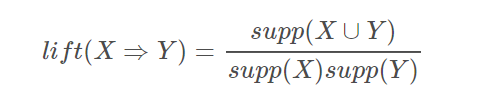



---



# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data ecommerce (Online Retail.csv) yang bisa temen-temen download [disini](https://www.kaggle.com/code/rockystats/apriori-algorithm-or-market-basket-analysis/data)

Sekarang import data ke DataFrame dengan library pandas.

In [47]:
!pip install openpyexcel

In [48]:
!wget Online_Retail.xlsx https://github.com/ripky/OFA/blob/63d0003b2b555f25f38db7ce4ae4868e84553997/dataset/Online%20Retail.xlsx

--2022-04-01 12:33:42--  http://online_retail.xlsx/
Resolving online_retail.xlsx (online_retail.xlsx)... failed: Name or service not known.
wget: unable to resolve host address ‘online_retail.xlsx’
--2022-04-01 12:33:42--  https://github.com/ripky/OFA/blob/63d0003b2b555f25f38db7ce4ae4868e84553997/dataset/Online%20Retail.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Online Retail.xlsx.1’

Online Retail.xlsx.     [ <=>                ] 120.54K  --.-KB/s    in 0.01s   

2022-04-01 12:33:44 (10.4 MB/s) - ‘Online Retail.xlsx.1’ saved [123432]

FINISHED --2022-04-01 12:33:44--
Total wall clock time: 2.1s
Downloaded: 1 files, 121K in 0.01s (10.4 MB/s)


In [49]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 541909 baris dan 8 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong 

In [50]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [51]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  

In [52]:
#melihat item yang terdapat pada variabel description
print('Unique Items: ', df['Description'].nunique())

Unique Items:  4223


In [53]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['Description'].nunique())
print( '\n', df['Description'].unique())

Unique Items:  4223

 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [54]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


In [55]:
#menghapus data yang kosong
print(df.dropna(inplace=True))

None


In [56]:
#mengecek kembali data yang kosong
print(df.isnull().sum().sort_values(ascending=False))

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


memisahkan InvoiceDate menjadi tahun, bulan dan hari sendiri

In [57]:
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9


In [58]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   year         406829 non-null  int64         
 9   month        406829 non-null  int64         
 10  day          406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 37.2+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536

## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 2010-12-01 hingga 2011-12-01. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [59]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Description'].value_counts().head(10)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: Description, dtype: int64


terlihat bahwa dari 2010-12-01 hingga 2011-12-01 barang yang paling banyak dibeli adalah **WHITE HANGING HEART T-LIGHT HOLDER** dengan pembelian sebanyak 2070 item. kemudian barang kedua yang paling banyak dibeli **REGENCY CAKESTAND 3 TIER** dengan pembelian sebanyak 1905 item. Dan untuk barang lainnya dapat dilihat pada barang 10 terlaris pada ecommerce

In [60]:
transaction_count = df.groupby(by='Description')[['InvoiceNo']].count().sort_values(by='InvoiceNo', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head(10)

,InvoiceNo
Description,
WHITE HANGING HEART T-LIGHT HOLDER,0.508813
REGENCY CAKESTAND 3 TIER,0.468256
JUMBO BAG RED RETROSPOT,0.408525
ASSORTED COLOUR BIRD ORNAMENT,0.348549
PARTY BUNTING,0.348058
LUNCH BAG RED RETROSPOT,0.333801
SET OF 3 CAKE TINS PANTRY DESIGN,0.302830
POSTAGE,0.293981
LUNCH BAG BLACK SKULL.,0.276775


berdasar kan hasil prosentase di atas dapat disimpulkan bahwa produk **WHITE HANGING HEART T-LIGHT HOLDER** sebanyak 50.88% artinya pembelian barang paling banyak berdasarkan transakti sebesar 50.88% atau sebanyak 2070 item adalah produk **WHITE HANGING HEART T_LIGHT HOLDER** 

Text(0.5, 1.0, 'Items Most Sold')

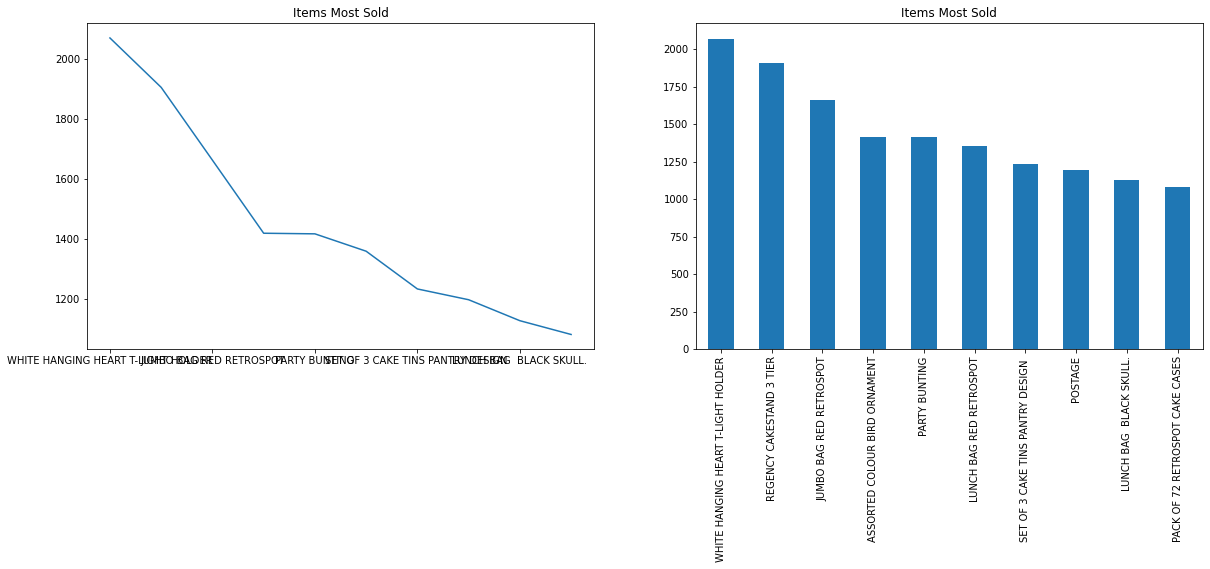

In [61]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

Berdasarkan hasil visualisasi, **WHITE HANGING HEART T_LIGHT HOLDER** adalah barang yang paling banyak terjual, diikuti oleh **REGENCY CAKESTAND, JUMBO BAG RED, DLL** . Ini menunjukan bahwa produk **WHITE HANGING HEART T_LIGHT HOLDER & REGENCY CAKESTAND 3 TIER** adalah produk utama dari Online Retail 

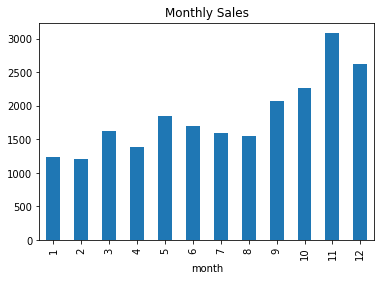

In [62]:
df.groupby('month')['InvoiceNo'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat bahwa dari awal tahun hingga akhir tahun mengalami kenaikan yang cukup signifikan. Dengan pembelian terbanyak terlihat di bulan 11 dengan pembelian sekitar 3000 item. Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [63]:
print(df.groupby('month')['day'].nunique())

month
1     24
2     24
3     27
4     21
5     25
6     26
7     26
8     26
9     26
10    26
11    26
12    21
Name: day, dtype: int64


In [64]:
df.groupby('month')['day'].nunique().describe()

count    12.000000
mean     24.833333
std       1.992410
min      21.000000
25%      24.000000
50%      26.000000
75%      26.000000
max      27.000000
Name: day, dtype: float64

dari hasil deskripsi hasil transaksi selama satu tahun terlahat bahwa rata rata transaksi pada Online retail selama 24.8 hari atau 25 hari dalam satu bulan. Dan transaksi terbanyak pada bulan 3 dengan transaksi selama 27 hari kemudian untuk transaksi paling sedikit pada bulan 12 dengan transaksi sebanyak 21 hari.

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar 

In [66]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['InvoiceNo'].unique():
    tlist = list(set(df[df['InvoiceNo']==i]['Description']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

22190


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [67]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [68]:
frequent_itemsets = apriori( df2, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift', 'leverage'	, 'conviction']].sort_values('lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift,leverage,conviction
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.021226,0.796954,24.126079,0.020346,4.762313
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.021226,0.642565,24.126079,0.020346,2.723197
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.021000,0.725857,20.999687,0.020000,3.521643
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.021000,0.607562,20.999687,0.020000,2.474449
25,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.020324,0.539474,20.255366,0.019321,2.113596
24,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.020324,0.763113,20.255366,0.019321,4.062388
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.025101,0.666268,20.169830,0.023857,2.897435
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025101,0.759891,20.169830,0.023857,4.007866
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.024155,0.590959,16.209376,0.022665,2.355614
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.024155,0.662546,16.209376,0.022665,2.842244


# **Kesimpulan**

Dapat dilihat dari analisis diatas, di mana semakin tinggi nilai peningkatan, semakin kuat korelasi antar item. Data dengan jelas menunjukkan bahwa **SET/6 RED SPOTTY PAPER CUPS** adalah barang yang paling popule. Selain **SET/6 RED SPOTTY PAPER CUPS**, mari kita lihat korelasi item yang lebih menarik 
(format: antecedant(s) -> consequent):


> GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER 

* ~nilai lift sebesar 20.16 > 1 **artinya bahwa kedua barang tersebut dibeli secara bersamaan**
* ~nilai convidence sebesar 79.6% **artinya bahwa kemungkinan barang GREEN REGENCY TEACUP AND SAUCER dibeli ketika barang PINK REGENCY TEACUP AND SAUCER dibeli sebesar 79.6%**
* ~nilai support sebesar 2.5% **artinya bahwa barang GREEN REGENCY TEACUP AND SAUCER mempunyai proporsi pembelian paling banyak ketika dari total transaksi**
* ~nilai leverage/rasio sebesar 2.3% **artinya bahwa perbedaan pembelian barang GREEN REGENCY TEACUP AND SAUCER dan ROSES REGENCY TEACUP AND SAUCER muncul bersama dalam data set sebesar 2.3%
 

#strategi untuk Online retail 

* Online Retail sebaiknya memberikan promo terhadap kedua barang GREEN REGENCY TEACUP AND SAUCER dan ROSES REGENCY TEACUP AND SAUCER untuk meningkatkan profitabilitas dikarenakan kedua barang tersebut mempunyai hubungan erat dalam pembelian dalam waktu yang bersamaan 

